In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
%matplotlib inline

In [2]:
np.random.seed(0)

n_pts = 500

X,y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise = 0.1,factor = 0.2)
X.shape,y.shape

((500, 2), (500,))

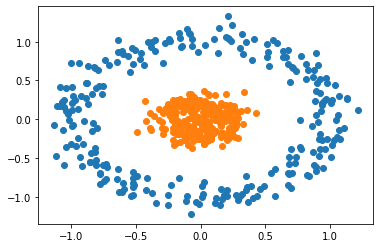

In [3]:
plt.scatter(X[y == 0, 0 ], X[y == 0 , 1])
plt.scatter(X[y == 1, 0 ], X[y == 1 , 1])
plt.show()

In [4]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 4 , activation = "sigmoid",input_shape = (2,)))
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

model.compile(tf.keras.optimizers.Adam(learning_rate = 0.01), loss = "binary_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [5]:
h = model.fit(X,y,verbose = 1, batch_size = 20 , epochs = 100, shuffle = True)

Epoch 1/100
25/25 [==============================] - 1s 5ms/step - loss: 0.7913 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6974 - accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.6460
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.5540
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5760
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6816 - accuracy: 0.7140
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.7380
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6735 - accuracy: 0.8220
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.8180
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6585 - accuracy: 0.9200
Epoch 11/

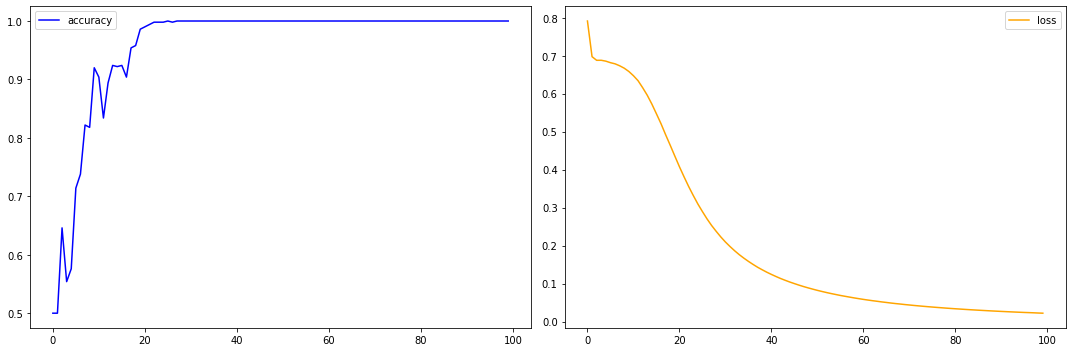

In [6]:
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.plot(h.history["accuracy"], label = "accuracy",color ="blue") 
plt.legend(loc = "best")

plt.subplot(122)
plt.plot(h.history["loss"], label = "loss",color = "orange") 
plt.legend(loc = "best")

plt.tight_layout()
plt.show()

In [7]:
def plot_decision_boundary(X,y,model):

    x_span = np.linspace(min(X[:,0]) - 0.25 , max(X[:,0]) + 0.25, 50)
    y_span = np.linspace(min(X[:,1]) - 0.25 , max(X[:,1]) + 0.25, 50)

    xx,yy = np.meshgrid(x_span,y_span)
    xx_,yy_ = xx.ravel(), yy.ravel()

    grid = np.c_[xx_,yy_]

    pred_func = model.predict(grid)

    z = pred_func.reshape(xx.shape)

    plt.contourf(xx,yy,z)

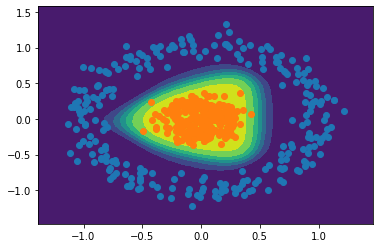

In [8]:
plot_decision_boundary(X,y,model)
plt.scatter(X[y == 0, 0 ], X[y == 0 , 1])
plt.scatter(X[y == 1, 0 ], X[y == 1 , 1])
plt.show()

Prediction is :  0.9879991


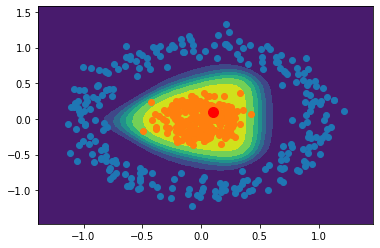

In [9]:
plot_decision_boundary(X,y,model)
plt.scatter(X[y == 0, 0 ], X[y == 0 , 1])
plt.scatter(X[y == 1, 0 ], X[y == 1 , 1])

x = 0.1
y = 0.1
point = np.array([[x,y]])
pred = model.predict(point)
print("Prediction is : ", pred[0][0])

plt.plot([x],[y],marker = "o", markersize = 10 ,color = "red")

plt.show()